# Classification

## Logistic Regression

### Resources

[Logistic Regression Tutorial for Machine Learning](http://machinelearningmastery.com/logistic-regression-tutorial-for-machine-learning/)

[Logistic Regression for Machine Learning](http://machinelearningmastery.com/logistic-regression-for-machine-learning/)

[How To Implement Logistic Regression With Stochastic Gradient Descent From Scratch With Python](http://machinelearningmastery.com/implement-logistic-regression-stochastic-gradient-descent-scratch-python/)

Logistic regression is the go-to linear classification algorithm for two-class problems. It is easy to implement, easy to understand and gets great results on a wide variety of problems, even when the expectations the method has for your data are violated.


### Description

Logistic regression is named for the function used at the core of the method, the [logistic function](https://en.wikipedia.org/wiki/Logistic_function).

The logistic function, also called the **Sigmoid function** was developed by statisticians to describe properties of population growth in ecology, rising quickly and maxing out at the carrying capacity of the environment. It’s an S-shaped curve that can take any real-valued number and map it into a value between 0 and 1, but never exactly at those limits.

$$f(x) = \frac{1}{1 + e^{-x}}$$

$e$ is the base of the natural logarithms and $x$ is value that you want to transform via the logistic function.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline

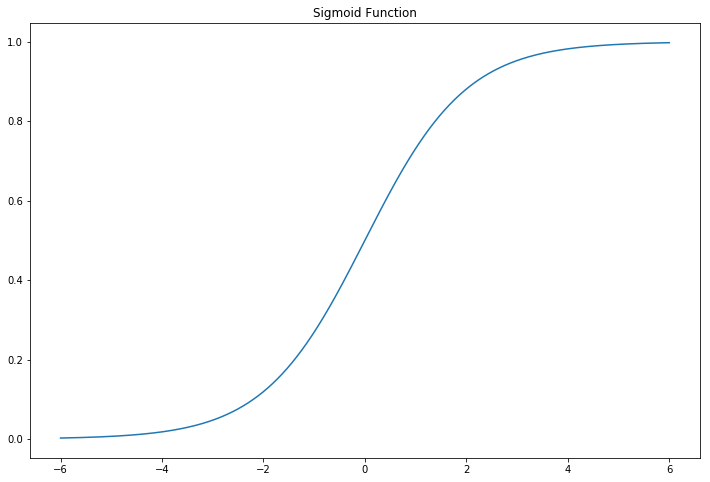

In [2]:
x = np.linspace(-6, 6, num = 1000)
plt.figure(figsize = (12,8))
plt.plot(x, 1 / (1 + np.exp(-x))); # Sigmoid Function
plt.title("Sigmoid Function");

***

The logistic regression equation has a very simiar representation like linear regression. The difference is that the output value being modelled is binary in nature.

$$\hat{y}=\frac{e^{\beta_0+\beta_1x_1}}{1+\beta_0+\beta_1x_1}$$

or

$$\hat{y}=\frac{1.0}{1.0+e^{-\beta_0-\beta_1x_1}}$$

$\beta_0$ is the intecept term

$\beta_1$ is the coefficient for $x_1$

$\hat{y}$ is the predicted output with real value between 0 and 1. To convert this to binary output of 0 or 1, this would either need to be rounded to an integer value or a cutoff point be provided to specify the class segregation point.

In [3]:
tmp = [0, 0.4, 0.6, 0.8, 1.0]

In [4]:
tmp

[0, 0.4, 0.6, 0.8, 1.0]

In [5]:
np.round(tmp)

array([0., 0., 1., 1., 1.])

In [6]:
np.array(tmp) > 0.7

array([False, False, False,  True,  True])

***

### Making Predictions with Logistic Regression

$$\hat{y}=\frac{1.0}{1.0+e^{-\beta_0-\beta_1x_i}}$$

$\beta_0$ is the intecept term

$\beta_1$ is the coefficient for $x_i$

$\hat{y}$ is the predicted output with real value between 0 and 1. To convert this to binary output of 0 or 1, this would either need to be rounded to an integer value or a cutoff point be provided to specify the class segregation point.

In [7]:
dataset = [[-2.0011, 0],
           [-1.4654, 0],
           [0.0965, 0],
           [1.3881, 0],
           [3.0641, 0],
           [7.6275, 1],
           [5.3324, 1],
           [6.9225, 1],
           [8.6754, 1],
           [7.6737, 1]]

Let's say you have been provided with the coefficient

In [8]:
coef = [-0.806605464, 0.2573316]

In [9]:
for row in dataset:
    yhat = 1.0 / (1.0 + np.exp(- coef[0] - coef[1] * row[0]))
    print("yhat {0:.4f}, yhat {1}".format(yhat, round(yhat)))

yhat 0.2106, yhat 0.0
yhat 0.2344, yhat 0.0
yhat 0.3139, yhat 0.0
yhat 0.3895, yhat 0.0
yhat 0.4955, yhat 0.0
yhat 0.7606, yhat 1.0
yhat 0.6377, yhat 1.0
yhat 0.7261, yhat 1.0
yhat 0.8063, yhat 1.0
yhat 0.7628, yhat 1.0


***

### Learning the Logistic Regression Model

The coefficients (Beta values b) of the logistic regression algorithm must be estimated from your training data. 

* Generally done using [maximum-likelihood estimation](https://en.wikipedia.org/wiki/Maximum_likelihood_estimation).

* Maximum-likelihood estimation is a common learning algorithm

* Note the underlying assumptions about the distribution of your data

* The best coefficients would result in a model that would predict a value very close to 1 (e.g. male) for the default class and a value very close to 0 (e.g. female) for the other class. 

* The intuition for maximum-likelihood for logistic regression is that a search procedure seeks values for the coefficients (Beta values) that minimize the error in the probabilities predicted by the model to those in the data.

### Learning with Stochastic Gradient Descent


Logistic Regression uses gradient descent to update the coefficients.

Each gradient descent iteration, the coefficients are updated using the equation:

$$\beta=\beta+\textrm{learning rate}\times (y-\hat{y}) \times \hat{y} \times (1-\hat{y}) \times x $$

***

## Using Scikit Learn to Estimate Logistic Regression Coefficients

In [10]:
from sklearn.linear_model import LogisticRegression

In [11]:
dataset

[[-2.0011, 0],
 [-1.4654, 0],
 [0.0965, 0],
 [1.3881, 0],
 [3.0641, 0],
 [7.6275, 1],
 [5.3324, 1],
 [6.9225, 1],
 [8.6754, 1],
 [7.6737, 1]]

In [12]:
X = np.array(dataset)[:, 0:1]
y = np.array(dataset)[:, 1]

In [13]:
X

array([[-2.0011],
       [-1.4654],
       [ 0.0965],
       [ 1.3881],
       [ 3.0641],
       [ 7.6275],
       [ 5.3324],
       [ 6.9225],
       [ 8.6754],
       [ 7.6737]])

In [14]:
y

array([0., 0., 0., 0., 0., 1., 1., 1., 1., 1.])

In [15]:
clf_LR = LogisticRegression(C=1.0, penalty='l2', tol=0.0001)

In [16]:
clf_LR.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [17]:
clf_LR.predict(X)

array([0., 0., 0., 0., 1., 1., 1., 1., 1., 1.])

In [18]:
clf_LR.predict_proba(X)

array([[0.89565647, 0.10434353],
       [0.86688737, 0.13311263],
       [0.74432098, 0.25567902],
       [0.59934245, 0.40065755],
       [0.38668774, 0.61331226],
       [0.0565882 , 0.9434118 ],
       [0.16375204, 0.83624796],
       [0.07941859, 0.92058141],
       [0.03376776, 0.96623224],
       [0.05533009, 0.94466991]])

## Further Resources

[A comparison of numerical optimizers for logistic regression](https://tminka.github.io/papers/logreg/)

[PDF: A comparison of numerical optimizers for logistic regression](https://tminka.github.io/papers/logreg/minka-logreg.pdf)

***

# Classification Based Machine Learning Algorithm

## Introduction


[An introduction to machine learning with scikit-learn](http://scikit-learn.org/stable/tutorial/basic/tutorial.html#introduction)


## Scikit-learn Definition:

**Supervised learning**, in which the data comes with additional attributes that we want to predict. This problem can be either:

* **Classification**: samples belong to two or more *classes* and we want to learn from already labeled data how to predict the class of unlabeled data. An example of classification problem would be the handwritten digit recognition example, in which the aim is to assign each input vector to one of a finite number of discrete categories. Another way to think of classification is as a discrete (as opposed to continuous) form of supervised learning where one has a limited number of categories and for each of the n samples provided, one is to try to label them with the correct category or class.


* **Regression**: if the desired output consists of one or more *continuous variables*, then the task is called regression. An example of a regression problem would be the prediction of the length of a salmon as a function of its age and weight.

The following example is inspired by Geron's [Hands-on Machine Learning with Scikit-Learn and TensorFlow](http://shop.oreilly.com/product/0636920052289.do)

MNIST dataset - a set of 70,000 small images of digits handwritten. You can read more via [The MNIST Database](http://yann.lecun.com/exdb/mnist/)

## Downloading the MNIST dataset

In [19]:
import numpy as np
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([0., 0., 0., ..., 9., 9., 9.])}

In [20]:
len(mnist['data'])

70000

In [21]:
np.unique(mnist['target'])

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

## Visualisation

In [22]:
X, y = mnist['data'], mnist['target']

In [23]:
X[69999]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [24]:
y[69999]

9.0

In [25]:
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


In [26]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

0.0


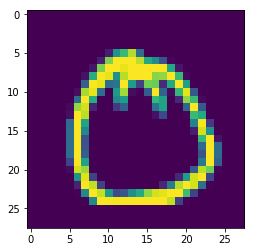

In [27]:
_ = X[1000]
_image = _.reshape(28, 28)
plt.imshow(_image);
print(y[1000])

## Splitting the train and test sets

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=0)

## Training a Binary Classifier

To simplify our problem, we will make this an exercise of "zero" or "non-zero", making it a two-class problem.

We need to first convert our target to 0 or non zero.

In [30]:
y_train_0 = (y_train == 0)
y_train_0

array([False, False, False, ..., False, False, False])

In [31]:
y_test_0 = (y_test == 0)
y_test_0

array([False, False, False, ..., False, False, False])

At this point we can pick any classifier and train it. This is the iterative part of choosing and testing all the classifiers and tuning the hyper parameters

In [32]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state = 42, solver="saga", n_jobs=-1)
clf.fit(X_train, y_train_0)

C:\ProgramData\Anaconda3\envs\tensorflow-clone-deep_learning\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=-1,
          penalty='l2', random_state=42, solver='saga', tol=0.0001,
          verbose=0, warm_start=False)

## Prediction

In [33]:
clf.predict(X[1000].reshape(1, -1))

array([ True])

## Performance Measures

### Measuring Accuracy Using Cross-Validation

### StratifiedKFold

Let's try with the `StratifiedKFold` stratified sampling to create multiple folds. At each iteration, the classifier was cloned and trained using the training folds and makes predictions on the test fold. 

StratifiedKFold utilised the Stratified sampling concept

* The population is divided into homogeneous subgroups called strata
* The right number of instances is sampled from each stratum 
* To guarantee that the test set is representative of the population

In [34]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
clf = LogisticRegression(random_state = 42)

In [35]:
skfolds = StratifiedKFold(n_splits=3, random_state=100)

In [36]:
for train_index, test_index in skfolds.split(X_train, y_train_0):
    clone_clf = clone(clf)
    X_train_fold = X_train[train_index]
    y_train_folds = (y_train_0[train_index])
    X_test_fold = X_train[test_index]    # validation test set within training dataset
    y_test_fold = (y_train_0[test_index]) # validation test set within training dataset
    
    clone_clf.fit(X_train_fold, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print("{0:.4f}".format(n_correct / len(y_pred)))

0.9882
0.9904
0.9897


### `cross_val_score` using K-fold Cross-Validation

K-fold cross-validation splits the training set into K-folds and then make predictions and evaluate them on each fold using a model trained on the remaning folds.

In [37]:
from sklearn.model_selection import cross_val_score
cross_val_score(clf, X_train, y_train_0, cv=3, scoring='accuracy')

array([0.9882145 , 0.99035732, 0.98966035])

### Danger of Blindly Applying Evaluator As a Performance Measure

Let's check against a dumb classifier

In [38]:
1 - sum(y_train_0) / len(y_train_0)

0.9001607142857143

A simple check shows that 90.1% of the images are not zero. Any time you guess the image is not zero, you will be right 90.13% of the time. 

Bare this in mind when you are dealing with **skewed datasets**. Because of this, accuracy is generally not the preferred performance measure for classifiers.

### Confusion Matrix

In [39]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(clf, X_train, y_train_0, cv=3)

In [40]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_0, y_train_pred)

array([[50111,   298],
       [  295,  5296]], dtype=int64)

In [41]:
import pandas as pd
pd.Series(y_train_0).value_counts()

False    50409
True      5591
dtype: int64

Each row: actual class

Each column: predicted class

**NB:** Every time you run the codes, you will get a different output.

First row: Non-zero images, the negative class:
* 50124 were correctly classified as non-zeros. **True negatives**. 
* 285 were wrongly predicted/classified as 0s. **False postive**


Second row: The images of zeros, the positive class:
* 293 were incorrectly predicted/classified as Non-zeros. **False negatives**
* 5298 were correctly classified as 0s. **True positives**


<img style="float: left;" src="img/confusion_matrix.jpg"  height=75%, width=100%>

### Precision



**Precision** measures the accuracy of positive predictions. Also called the `precision` of the classifier

$$\textrm{precision} = \frac{\textrm{True Positives}}{\textrm{True Positives} + \textrm{False Positives}}$$

<img style="float: left;" src="img/precision.jpg"  height=100%, width=100%>

Note the result here may vary from the video as the results from the confusion matrix are different each time you run it.

In [42]:
from sklearn.metrics import precision_score, recall_score

In [43]:
precision_score(y_train_0, y_train_pred) 

0.9467286378262424

### Recall



`Precision` is typically used with `recall` (`Sensitivity` or `True Positive Rate`). The ratio of positive instances that are correctly detected by the classifier.

$$\textrm{recall} = \frac{\textrm{True Positives}}{\textrm{True Positives} + \textrm{False Negatives}}$$

<img style="float: left;" src="img/recall.jpg"  height=100%, width=100%>

In [44]:
recall_score(y_train_0, y_train_pred) 

0.9472366302986943

### F1 Score


$F_1$ score is the harmonic mean of precision and recall. Regular mean gives equal weight to all values. Harmonic mean gives more weight to low values.


$$F_1=\frac{2}{\frac{1}{\textrm{precision}}+\frac{1}{\textrm{recall}}}=2\times \frac{\textrm{precision}\times \textrm{recall}}{\textrm{precision}+ \textrm{recall}}=\frac{TP}{TP+\frac{FN+FP}{2}}$$

The $F_1$ score favours classifiers that have similar precision and recall.

In [45]:
from sklearn.metrics import f1_score
f1_score(y_train_0, y_train_pred)

0.9469825659365222

### Precision / Recall Tradeoff


Increasing precision reduced recall and vice versa

<img style="float: left;" src="img/precision-recall.png"  height=50%, width=75%>

Our classifier is designed to pick up zeros.

12 observations

***

**Central Arrow**

Suppose the decision threshold is positioned at the central arrow: 
* We get 4 true positives (We have 4 zeros to the right of the central arrow)
* 1 false positive which is actually seven.

At this threshold, the **precision accuracy** is $\frac{4}{5}=80\%$

However, out of the 6 zeros, the classifier only picked up 4. The **recall accuracy** is $\frac{4}{6}=67\%$

***

**Right Arrow**

* We get 3 true positives
* 0 false positive

At this threshold, the **precision accuracy** is $\frac{3}{3}=100\%$
However, out of the 6 zeros, the classifier only picked up 3. The **recall accuracy** is $\frac{3}{6}=50\%$

***

**Left Arrow**

* We get 6 true positives
* 2 false positive

At this threshold, the **precision accuracy** is $\frac{6}{8}=75\%$
Out of the 6 zeros, the classifier picked up all 6. The **recall accuracy** is $\frac{6}{6}=100\%$

***




In [47]:
clf = LogisticRegression(random_state = 42, solver="saga", n_jobs=-1)
# clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train_0)

C:\ProgramData\Anaconda3\envs\tensorflow-clone-deep_learning\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=-1,
          penalty='l2', random_state=42, solver='saga', tol=0.0001,
          verbose=0, warm_start=False)

In [48]:
y[1000]

0.0

In [49]:
y_scores = clf.decision_function(X[1000].reshape(1, -1))
y_scores

array([0.80719505])

In [50]:
threshold = 0

In [51]:
y_some_digits_pred = (y_scores > threshold)
y_some_digits_pred

array([ True])

In [52]:
threshold = 40000
y_some_digits_pred = (y_scores > threshold)
y_some_digits_pred

array([False])

In [53]:
y_scores = cross_val_predict(clf, X_train, y_train_0, cv=3, method='decision_function',
                             n_jobs=-1)

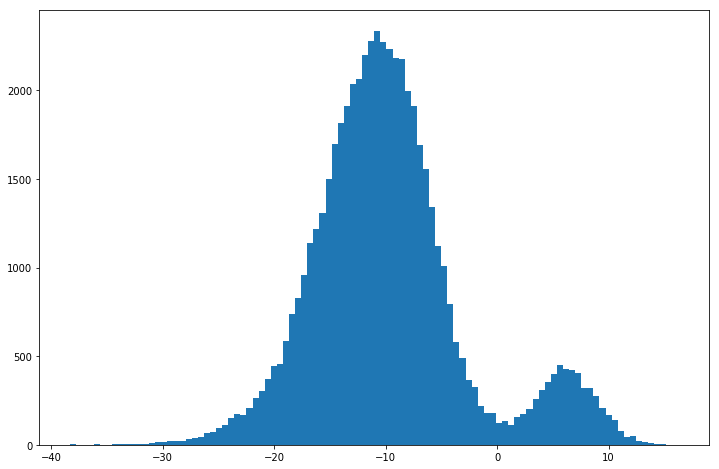

In [54]:
plt.figure(figsize=(12,8)); plt.hist(y_scores, bins=100);

With the decision scores, we can compute precision and recall for all possible thresholds using the `precision_recall_curve()` function:

In [55]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_0, y_scores)
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([-0.5,1.5])    

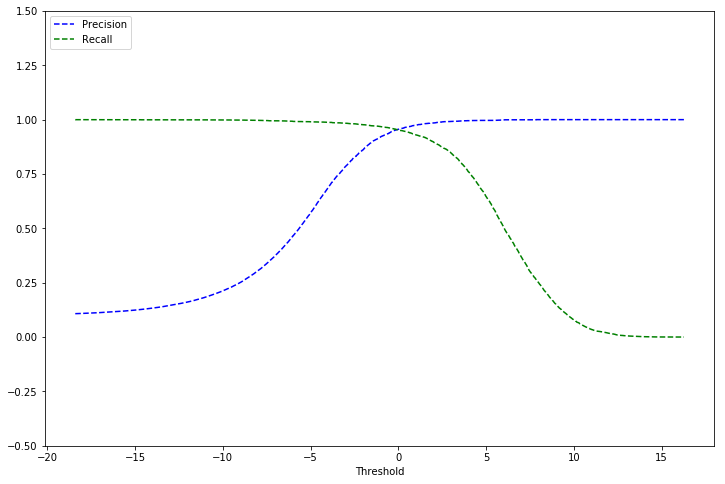

In [56]:
plt.figure(figsize=(12,8)); 
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

With this chart, you can select the threshold value that gives you the best precision/recall tradeoff for your task.

Some tasks may call for higher precision (accuracy of positive predictions). Like designing a classifier that picks up adult contents to protect kids. In finance context, pick up fraudster or compliance issues. This will require the classifier to set a high bar to allow any contents to be consumed by children.

Some tasks may call for higher recall (ratio of positive instances that are correctly detected by the classifier). Such as detecting shoplifters/intruders on surveillance images - Anything that remotely resemble "positive" instances to be picked up.

***

One can also plot precisions against recalls to assist with the threshold selection

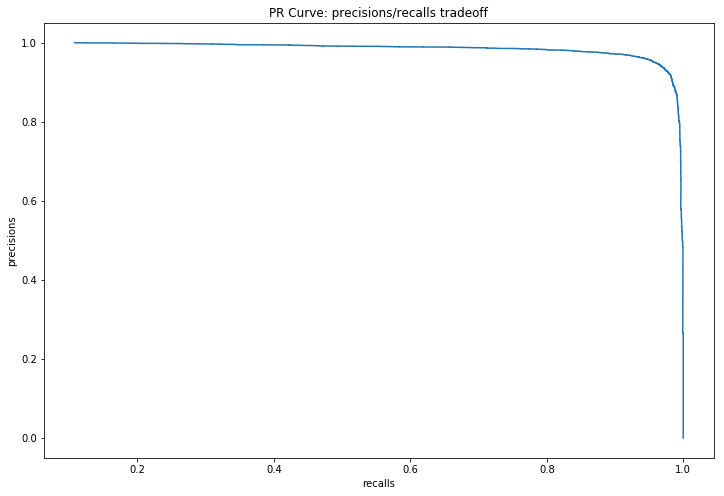

In [57]:
plt.figure(figsize=(12,8)); 
plt.plot(precisions, recalls);
plt.xlabel('recalls');
plt.ylabel('precisions');
plt.title('PR Curve: precisions/recalls tradeoff');

### Setting High Precisions


Let's aim for 90% precisions.

In [58]:
len(precisions)

51905

In [59]:
len(thresholds)

51904

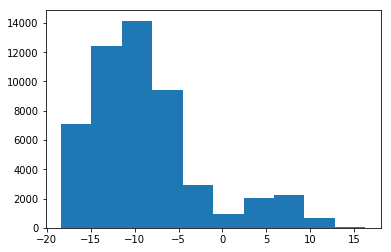

In [60]:
plt.hist(thresholds);

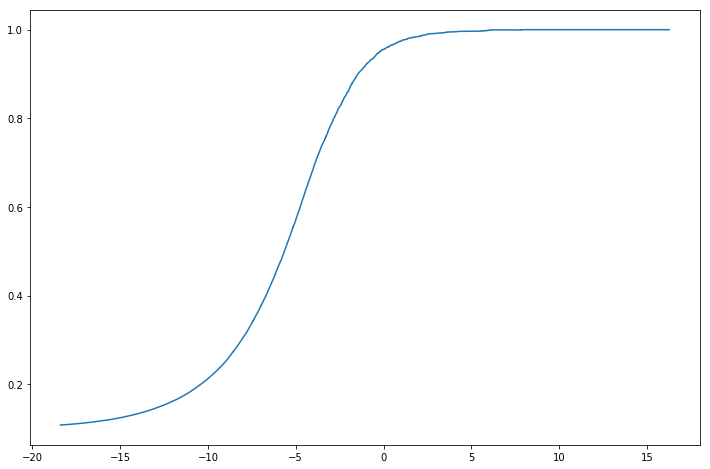

In [61]:
plt.figure(figsize=(12,8)); 
plt.plot(thresholds, precisions[1:]);

In [62]:
idx = len(precisions[precisions < 0.9])

In [74]:
thres_val_90 = thresholds[idx]
thres_val_90

2.550332551105167

In [75]:
y_train_pred_90 = (y_scores > thres_val_90)

In [76]:
precision_score(y_train_0, y_train_pred_90)

0.9002485501242751

In [77]:
recall_score(y_train_0, y_train_pred_90)

0.9717402969057414

### Setting High Precisions


Let's aim for 99% precisions.

In [78]:
idx = len(precisions[precisions < 0.99])

This is the same as the line above

idx = len(precisions) - len(precisions[precisions > 0.99])

In [79]:
thres_val_99 = thresholds[idx]

In [80]:
y_train_pred_90 = (y_scores > thres_val_99)

In [81]:
precision_score(y_train_0, y_train_pred_90)

0.9900345739271914

In [82]:
recall_score(y_train_0, y_train_pred_90)

0.8706850295117152

### The Receiver Operating Characteristics (ROC) Curve

Instead of plotting precision versus recall, the ROC curve plots the `true positive rate` (another name for recall) against the `false positive rate`. The `false positive rate` (FPR) is the ratio of negative instances that are incorrectly classified as positive. It is equal to one minus the `true negative rate` (TNR), which is the ratio of negative instances that are correctly classified as negative.

The TNR is also called `specificity`. Hence the ROC curve plots `sensitivity` (recall) versus `1 - specificity`.

<img style="float: left;" src="img/tnr_and_fpr.png"  height=100%, width=100%>

In [83]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_0, y_scores)
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1], [0,1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')

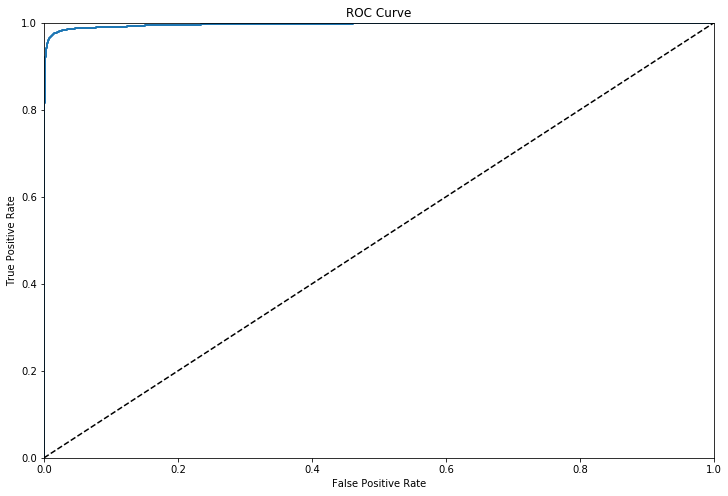

In [84]:
plt.figure(figsize=(12,8)); 
plot_roc_curve(fpr, tpr)
plt.show();

In [85]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_0, y_scores)

0.996423688142637

Use PR curve whenever the **positive class is rare** or when you care more about the false positives than the false negatives

Use ROC curve whenever the **negative class is rare** or when you care more about the false negatives than the false positives


In the example above, the ROC curve seemed to suggest that the classifier is good. However, when you look at the PR curve, you can see that there are room for improvement.

## Model Comparison


Random Forest

In [86]:
from sklearn.ensemble import RandomForestClassifier
f_clf = RandomForestClassifier(random_state=0)
y_probas_forest = cross_val_predict(f_clf, X_train, y_train_0,
                                    cv=3, method='predict_proba')

In [87]:
y_scores_forest = y_probas_forest[:, 1]
fpr_forest, tpr_forest, threshold_forest = roc_curve(y_train_0, y_scores_forest)

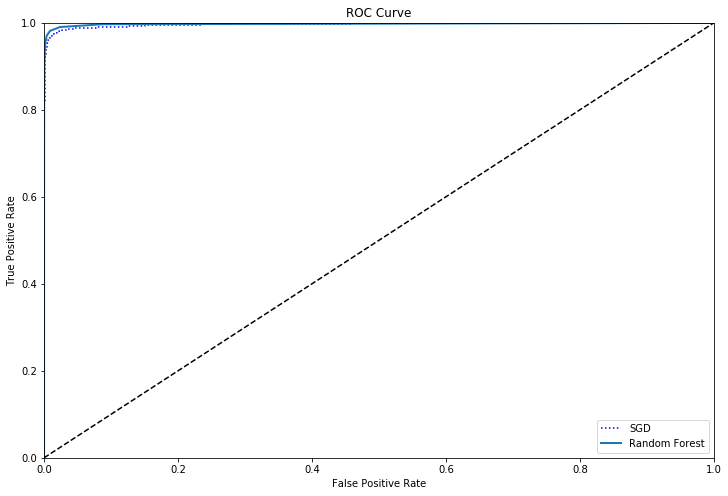

In [88]:
plt.figure(figsize=(12,8)); 
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show();

In [89]:
roc_auc_score(y_train_0, y_scores_forest)

0.997633140201295

In [90]:
f_clf.fit(X_train, y_train_0)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [91]:
y_train_rf = cross_val_predict(f_clf, X_train, y_train_0, cv=3)

In [92]:
precision_score(y_train_0, y_train_rf) 

0.9916078580965096

In [93]:
recall_score(y_train_0, y_train_rf) 

0.9298873189053837

In [94]:
confusion_matrix(y_train_0, y_train_rf)

array([[50365,    44],
       [  392,  5199]], dtype=int64)

***